# WENO Smoothness Indicators
[]: # (C) 2017-2024, Manuel A. Diaz

In [2]:
# Load everything from sympy
from sympy import *
init_printing(use_unicode=True)

Smoothness indicators:


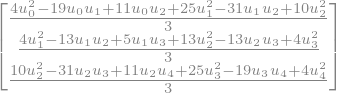

In [5]:
# Compute smoothness indicators
print("Smoothness indicators:")

x = Symbol('x')
dx = Symbol('dx')
X = [-2*dx, -dx, 0, dx, 2*dx]
U = symbols('u_0:5')

def dp(j, l, r=3) :
    pj = polys.specialpolys.interpolating_poly(r, x, X=X[j:j+r], Y=U[j:j+r])
    dpj = pj.diff(x, l).expand().simplify()
    dpj2 = dpj**2
    idpj2 = integrate(dpj2, (x, -dx/2, dx/2))
    return idpj2

# Compute smoothness indicators
beta1 = sum(dx**(2*l-1) * dp(0, l) for l in range(1, 3)).simplify().factor()
beta2 = sum(dx**(2*l-1) * dp(1, l) for l in range(1, 3)).simplify().factor()
beta3 = sum(dx**(2*l-1) * dp(2, l) for l in range(1, 3)).simplify().factor()
beta = Matrix([beta1, beta2, beta3]).applyfunc(nsimplify)
beta
